Handwritten_Digit_Recognizer

In [2]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# Show basic shapes
print("Raw Data Shapes:")
print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_test: {y_test.shape}")

Raw Data Shapes:
x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [5]:
# Convert one image (first training image) to DataFrame for demonstration
df_sample = pd.DataFrame(x_train[0])
print("\nFirst Image as DataFrame (28x28 flattened):")
print(df_sample.head())


First Image as DataFrame (28x28 flattened):
   0   1   2   3   4   5   6   7   8   9   ...  18  19  20  21  22  23  24  \
0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

   25  26  27  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 28 columns]


In [6]:
print("\nStatistical Summary of First Image Pixels:")
print(df_sample.describe())


Statistical Summary of First Image Pixels:
         0     1     2     3           4           5           6           7   \
count  28.0  28.0  28.0  28.0   28.000000   28.000000   28.000000   28.000000   
mean    0.0   0.0   0.0   0.0    6.821429   15.178571   17.750000   26.571429   
std     0.0   0.0   0.0   0.0   27.364553   56.810962   62.830533   72.063464   
min     0.0   0.0   0.0   0.0    0.000000    0.000000    0.000000    0.000000   
25%     0.0   0.0   0.0   0.0    0.000000    0.000000    0.000000    0.000000   
50%     0.0   0.0   0.0   0.0    0.000000    0.000000    0.000000    0.000000   
75%     0.0   0.0   0.0   0.0    0.000000    0.000000    0.000000    0.000000   
max     0.0   0.0   0.0   0.0  136.000000  253.000000  253.000000  253.000000   

               8           9   ...          18          19          20  \
count   28.000000   28.000000  ...   28.000000   28.000000   28.000000   
mean    45.500000   50.678571  ...   62.678571   40.428571   20.250000   
std 

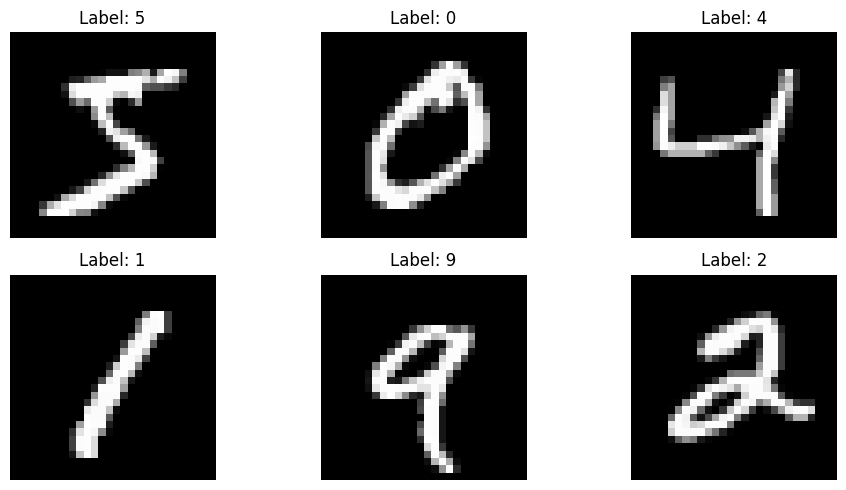

In [7]:
#  Plot first few images
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Class Distribution in Training Set:
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64


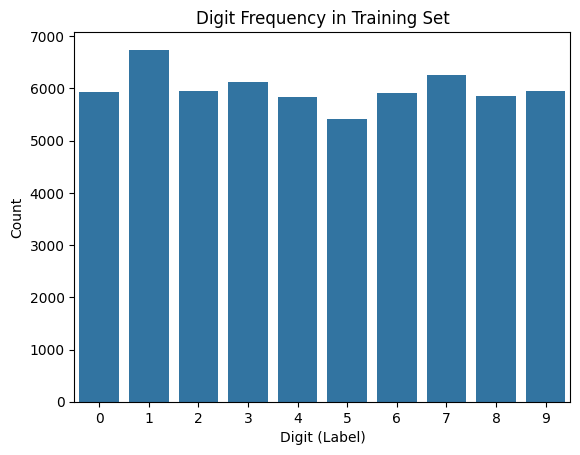

In [8]:
# Analyze class distribution
print("Class Distribution in Training Set:")
print(pd.Series(y_train).value_counts().sort_index())

sns.countplot(x=y_train)
plt.title("Digit Frequency in Training Set")
plt.xlabel("Digit (Label)")
plt.ylabel("Count")
plt.show()

In [9]:
#  Reshape, Normalize, One-Hot Encode
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("Preprocessed Shapes:")
print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train_cat.shape}")

Preprocessed Shapes:
x_train: (60000, 28, 28, 1)
y_train: (60000, 10)


In [10]:
#  Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

c:\Users\vanra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#  Train the model
history = model.fit(x_train, y_train_cat, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.7747 - loss: 0.6783 - val_accuracy: 0.9847 - val_loss: 0.0561
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9572 - loss: 0.1438 - val_accuracy: 0.9862 - val_loss: 0.0484
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9691 - loss: 0.1029 - val_accuracy: 0.9883 - val_loss: 0.0405
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9744 - loss: 0.0851 - val_accuracy: 0.9895 - val_loss: 0.0383
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9779 - loss: 0.0724 - val_accuracy: 0.9908 - val_loss: 0.0339


In [14]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9865 - loss: 0.0378

Test Accuracy: 0.9895


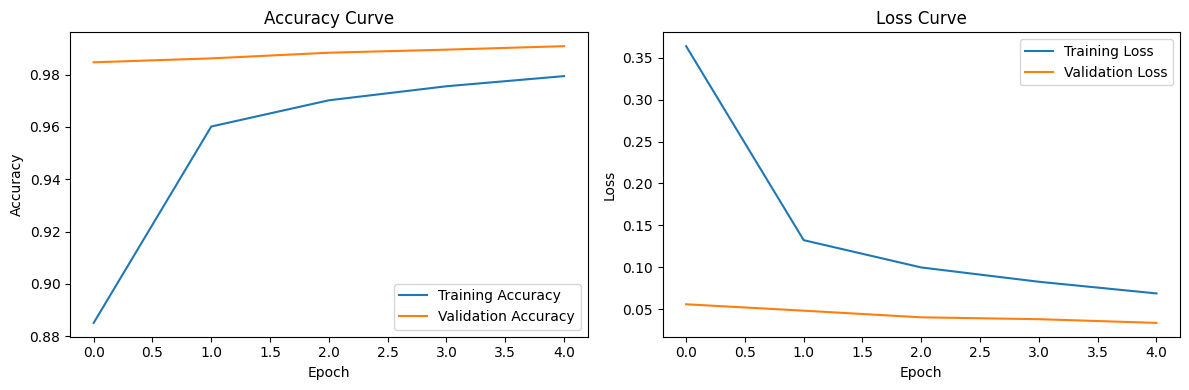

In [15]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


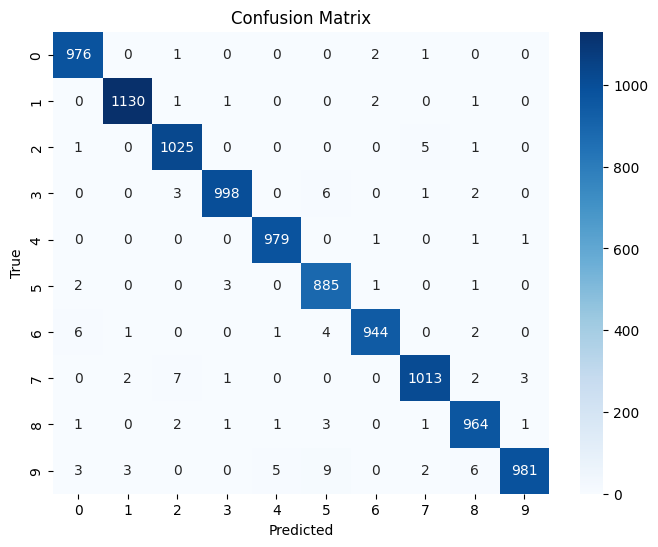

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [16]:
# Confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = y_test

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_true_classes, y_pred_classes))